In [2]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 2.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import yfinance as yf
import calendar 

In [10]:

Data = yf.download('^DJI',interval='1wk',start = '2004-1-1',end = '2018-3-26')
Prices = pd.DataFrame(Data['Close']).reset_index()

Prices


[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2004-01-01,10529.030273
1,2004-01-08,10538.370117
2,2004-01-15,10623.620117
3,2004-01-22,10468.370117
4,2004-01-29,10470.740234
...,...,...
738,2018-02-22,25029.199219
739,2018-03-01,24801.359375
740,2018-03-08,24758.119141
741,2018-03-15,24682.310547


In [19]:
google_trends = pd.read_csv (r'debt_google_trend.csv')
google_trends['Date'] = pd.to_datetime(google_trends['Mes'])
google_trends = pd.DataFrame(google_trends)

google_trends

,Mes,debt,Date
0,2004-01,61,2004-01-01
1,2004-02,62,2004-02-01
2,2004-03,59,2004-03-01
3,2004-04,58,2004-04-01
4,2004-05,55,2004-05-01
...,...,...,...
166,2017-11,46,2017-11-01
167,2017-12,42,2017-12-01
168,2018-01,47,2018-01-01
169,2018-02,50,2018-02-01


In [18]:
Trends = Prices.merge(google_trends,left_on='Date',right_on='Mes')

Trends



,Date,Close,Mes,debt
0,2004-01-01,10529.030273,2004-01-01,61
1,2004-04-01,10480.150391,2004-04-01,58
2,2004-07-01,10240.290039,2004-07-01,55
3,2005-09-01,10633.500000,2005-09-01,54
4,2005-12-01,10810.910156,2005-12-01,49
5,2006-06-01,10930.900391,2006-06-01,56
6,2007-02-01,12666.870117,2007-02-01,55
7,2007-03-01,12192.450195,2007-03-01,54
8,2007-11-01,13300.019531,2007-11-01,50
9,2008-05-01,12814.349609,2008-05-01,50


In [25]:
Trends = pd.merge_asof(google_trends,Prices,on='Date')

Trends.set_index('Date')

,Mes,debt,Close
Date,,,
2004-01-01,2004-01,61,10529.030273
2004-02-01,2004-02,62,10470.740234
2004-03-01,2004-03,59,10593.110352
2004-04-01,2004-04,58,10480.150391
2004-05-01,2004-05,55,10310.950195
...,...,...,...
2017-11-01,2017-11,46,23435.009766
2017-12-01,2017-12,42,24140.910156
2018-01-01,2018-01,47,24922.679688


In [37]:
Trends =pd.merge_ordered(Prices,google_trends, fill_method="ffill", left_by="Date")
Trends = Trends.set_index('Date')
Trends=Trends.drop(['Mes'], axis=1)
Trends=Trends.ffill(axis = 0)
Trends

,Close,debt
Date,,
2004-01-01,10529.030273,61.0
2004-01-08,10538.370117,61.0
2004-01-15,10623.620117,61.0
2004-01-22,10468.370117,61.0
2004-01-29,10470.740234,61.0
...,...,...
2018-02-22,25029.199219,50.0
2018-03-01,24801.359375,47.0
2018-03-08,24758.119141,47.0


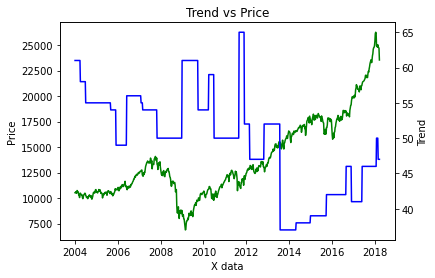

In [43]:

y1 = Trends['Close']
y2 = Trends['debt']
 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(y1,'g-')
ax2.plot(y2,'b-')
 
ax1.set_xlabel("X data")
ax1.set_ylabel("Price")
 
ax2.set_ylabel("Trend")
plt.title('Trend vs Price')
plt.show()